<a href="https://colab.research.google.com/github/stancanrold/Sepal-and-Petal-length-model/blob/master/HW4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets_19_420_Iris.csv to datasets_19_420_Iris (3).csv


In [ ]:
import io
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
df = pd.read_csv(io.BytesIO(uploaded['datasets_19_420_Iris.csv']))# Dataset is now stored in a Pandas Dataframe
df.head()# Lets have a preview of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Let's see the dataset summary and if there are any null values
#It seems there are no null values
df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Let's see how many samples are there for each species
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


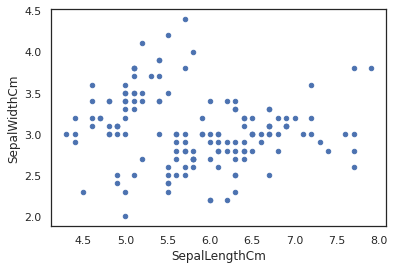

In [ ]:
# Let's Make a plot of the Iris features
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

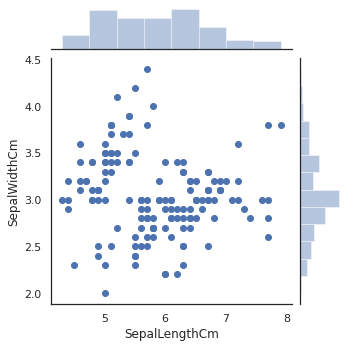

In [ ]:
# Let's make a seaborn jointplot. It shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

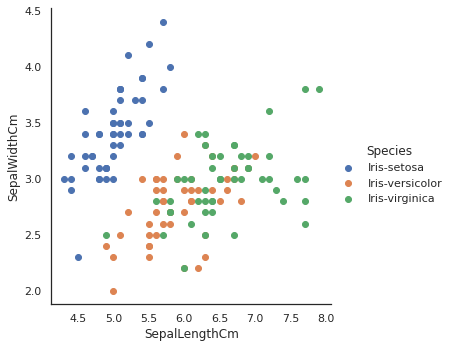

In [ ]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

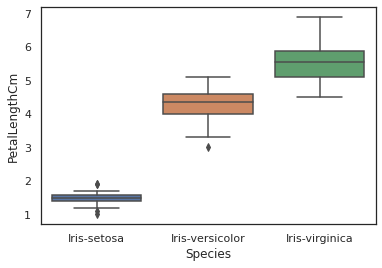

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

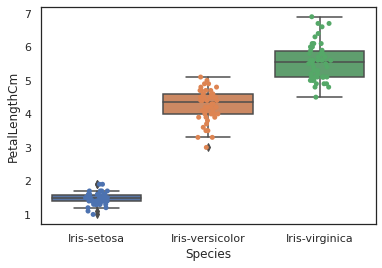

In [ ]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")


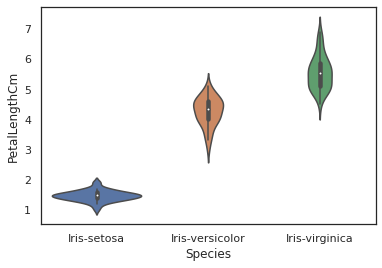

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)

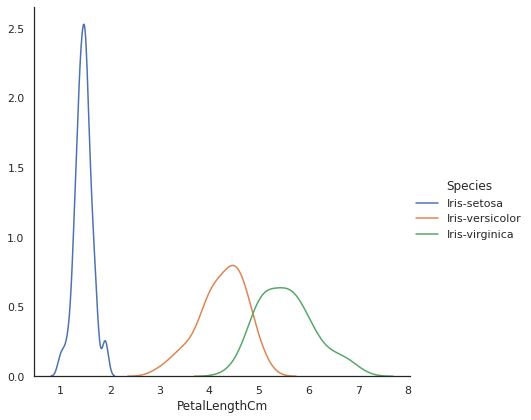

In [ ]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

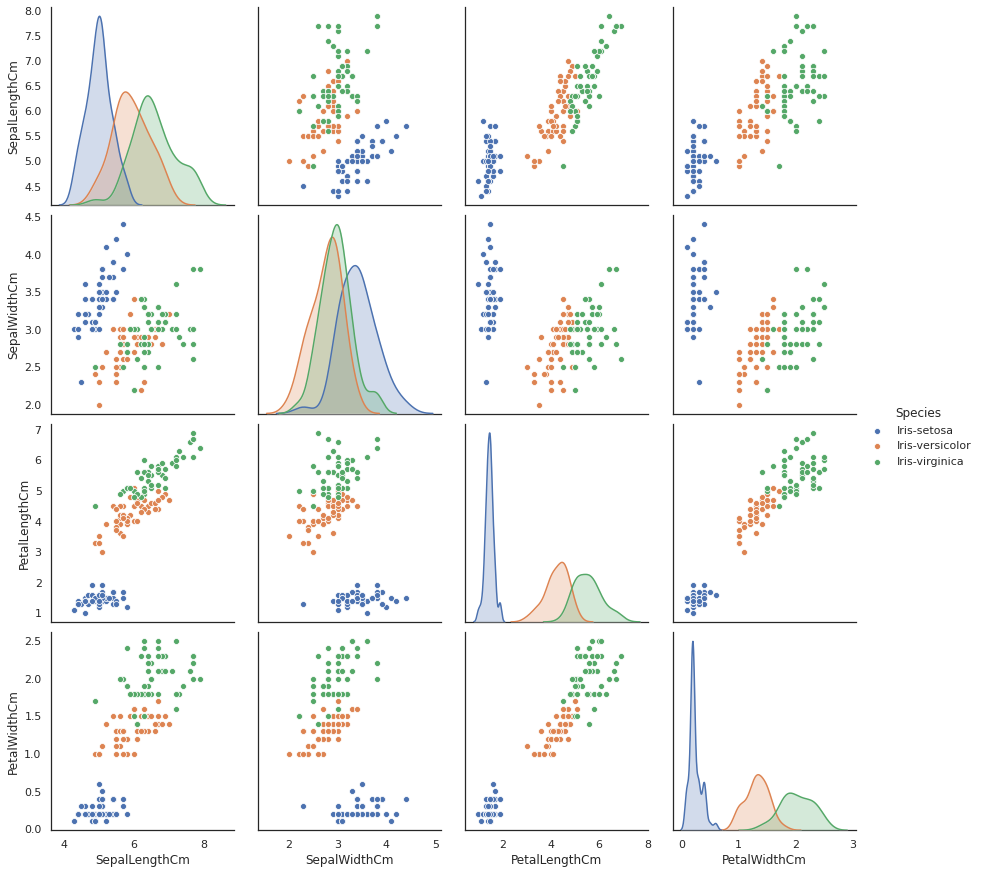

In [ ]:
# From the pairplot, we see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)

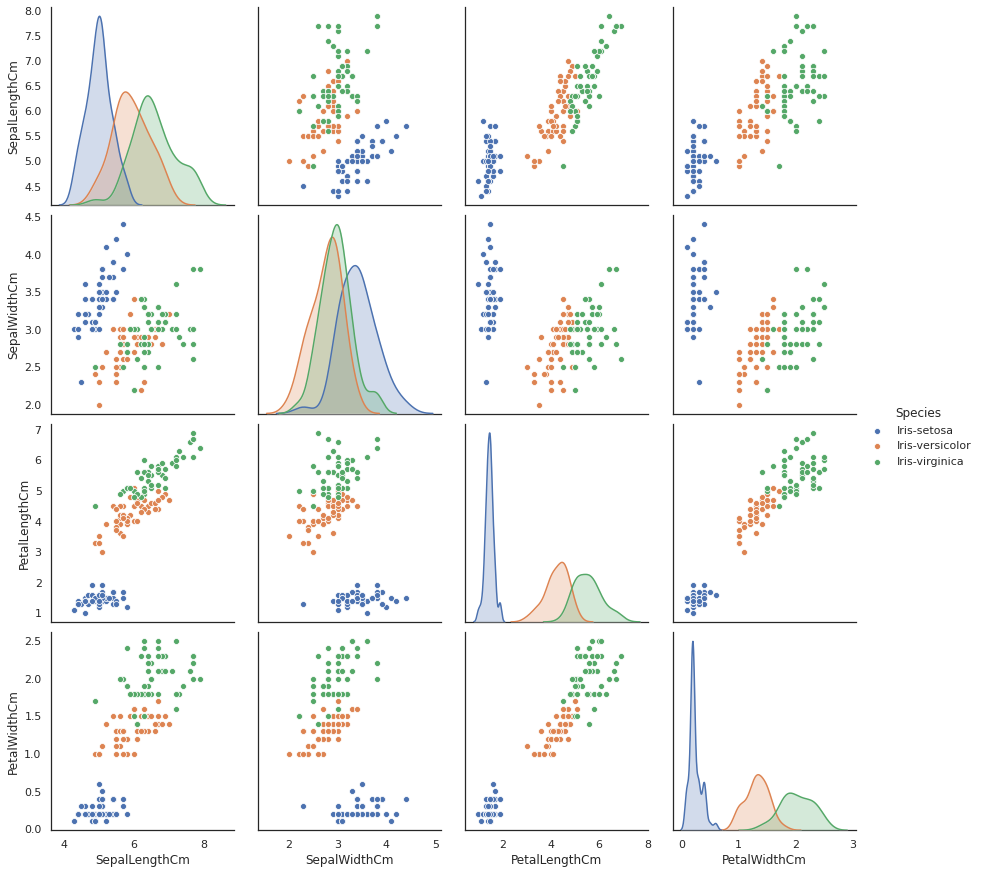

In [ ]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f227519c278>,
      dtype=object)

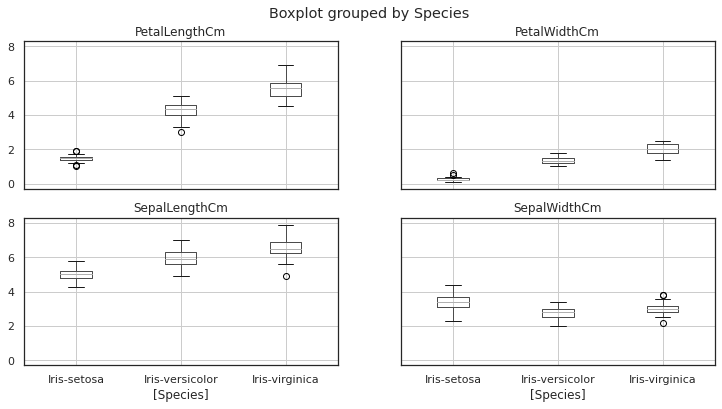

In [ ]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

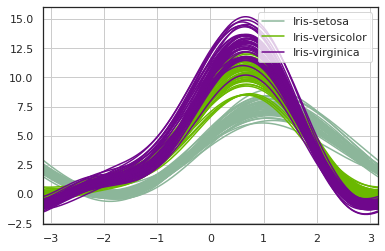

In [ ]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(df.drop("Id", axis=1), "Species")

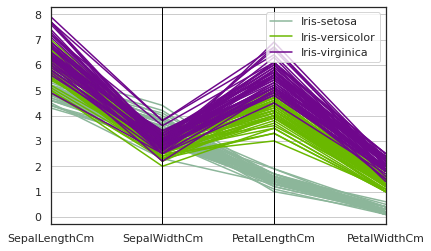

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop("Id", axis=1), "Species")



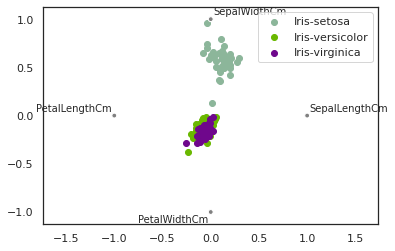

In [ ]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")

In [ ]:
# #Let's drop the ID column it wont be important for our prediction
df.drop('Id',axis=1,inplace=True) 


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
X = df.drop('Species',axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Train Models
##Let's start with Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(X_train,y_train)
predictions=LogR.predict(X_test)
print(classification_report(y_test, predictions))
print('Confusion Matrix:\n' ,  confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


##Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
DecTree.fit(X_train,y_train)
predictions=gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, predictions))
print('Confusion Matrix:\n' ,  confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train,y_train)
prediction=DecTree.predict(X_test)
print(classification_report(y_test, predictions))
print('Confusion Matrix:\n' ,  confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
R_Forest = RandomForestClassifier()
R_Forest.fit(X_train,y_train)
prediction=R_Forest.predict(X_test)
print(classification_report(y_test, predictions))
print('Confusion Matrix:\n' ,  confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
prediction=KNN.predict(X_test)
print(classification_report(y_test, predictions))
print( 'Confusion Matrix:\n' , confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

Confusion Matrix
 [[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
